In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scpy

In [ ]:
from google.colab import files
data=files.upload()

Saving delhivery_data.txt to delhivery_data.txt


In [ ]:
df=pd.read_csv('delhivery_data.txt')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


**1. Basic data cleaning and EDA**

Get shape of the data

In [ ]:
df.shape

(144867, 24)

Data consisits of 144867 rows and 24 columns

Columns and Datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
#dropping unknown fields
unknown_feilds=["is_cutoff","cutoff_factor",'cutoff_timestamp',"factor","segment_factor"]
df=df.drop(unknown_feilds,axis=1)

These are the unknown fields shown in the dataset. Therefore, these columns are removed for further analysis.

In [ ]:
# checking unique entities in each column
for col in df.columns:
  print(col, "=", df[col].nunique())

data = 2
trip_creation_time = 14817
route_schedule_uuid = 1504
route_type = 2
trip_uuid = 14817
source_center = 1508
source_name = 1498
destination_center = 1481
destination_name = 1468
od_start_time = 26369
od_end_time = 26369
start_scan_to_end_scan = 1915
actual_distance_to_destination = 144515
actual_time = 3182
osrm_time = 1531
osrm_distance = 138046
segment_actual_time = 747
segment_osrm_time = 214
segment_osrm_distance = 113799


In [ ]:
#converting cols to category
category=['data','route_type']
for col in category:
  df[col]=df[col].astype("category")

In [ ]:
# converting cols to float
floating_columns=['segment_osrm_distance','start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time']
for col in floating_columns:
  df[col]=df[col].astype('float32')

In [ ]:
# converting string to date format
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

Missing or null values

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
#filling null value in source_name
df['source_name']=df['source_name'].fillna('unknown')
df['destination_name']=df['destination_name'].fillna('unknown')

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**Basic description about the data**

In [ ]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262939,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809
std,NaN,NaN,NaN,1036.997803,344.979126,598.096069,308.004333,421.117462,53.566002,14.770471,17.860197


In [ ]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1499,1481,1469
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


**Merging rows and aggregration**

In [ ]:
segment_agg = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg({
    # Meta info
    'data': 'first',
    'route_type': 'first',
    'trip_creation_time': 'first',

    # Location info
    'source_name': 'first',
    'destination_name': 'last',

    # Time info
    'od_start_time': 'min',     # Earliest segment start
    'od_end_time': 'max',       # Latest segment end
    'start_scan_to_end_scan': 'sum',  # Total scan-to-scan duration

    # Distance & time (actual and OSRM)
    'actual_distance_to_destination': 'first',  # Assume this is same for all rows
    'actual_time': 'sum',
    'osrm_time':'sum',
    'osrm_distance': 'sum',

    # Segment-level aggregates
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}).reset_index()
segment_agg








,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,22680.0,34.015099,6484.0,3464.0,4540.125977,728.0,534.0,670.620483
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,20979.0,22.812439,9198.0,4323.0,6037.638672,820.0,474.0,649.852783
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,174.0,9.357635,96.0,55.0,60.315701,46.0,26.0,28.199501
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,732.0,9.832310,303.0,155.0,209.115097,95.0,39.0,55.989899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,10008.0,24.680126,2601.0,1427.0,1975.740967,608.0,231.0,317.740784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,248.0,9.167748,119.0,106.0,106.708405,49.0,42.0,42.143101
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,364.0,9.393822,173.0,108.0,111.855499,89.0,77.0,78.586899
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,88.0,9.010429,51.0,22.0,25.537100,29.0,14.0,16.018400
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,574.0,22.000767,278.0,59.0,76.516899,233.0,42.0,52.530300


In [ ]:
#Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
segment_agg['od_total_time']=segment_agg['od_end_time']-segment_agg['od_start_time']
segment_agg['od_total_time']=segment_agg['od_total_time'].apply(lambda x: x.total_seconds()/60)
segment_agg.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,22680.0,34.015099,6484.0,3464.0,4540.125977,728.0,534.0,670.620483,1260.604421
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,20979.0,22.812439,9198.0,4323.0,6037.638672,820.0,474.0,649.852783,999.505379
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,174.0,9.357635,96.0,55.0,60.315701,46.0,26.0,28.199501,58.832388
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,732.0,9.832310,303.0,155.0,209.115097,95.0,39.0,55.989899,122.779486
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,10008.0,24.680126,2601.0,1427.0,1975.740967,608.0,231.0,317.740784,834.638929


In [ ]:
#dropping unnecessary columns:
segment_agg=segment_agg.drop(['od_start_time','od_end_time'],axis=1)
segment_agg.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),22680.0,34.015099,6484.0,3464.0,4540.125977,728.0,534.0,670.620483,1260.604421
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),20979.0,22.812439,9198.0,4323.0,6037.638672,820.0,474.0,649.852783,999.505379
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),174.0,9.357635,96.0,55.0,60.315701,46.0,26.0,28.199501,58.832388
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),732.0,9.832310,303.0,155.0,209.115097,95.0,39.0,55.989899,122.779486
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),10008.0,24.680126,2601.0,1427.0,1975.740967,608.0,231.0,317.740784,834.638929


In [ ]:
# second level aggregation only with trip_id
df_2 = segment_agg.groupby('trip_uuid').agg({
    # Meta info
    'data': 'first',
    'route_type': 'first',
    'trip_creation_time': 'first',

    # Location info (can vary if multiple hops, so pick first/last)
    'source_center': 'first',
    'destination_center': 'last',
    'source_name': 'first',
    'destination_name': 'last',

    # Time info
    'od_total_time':'sum',
    'start_scan_to_end_scan': 'sum',

    # Distance & time (actual and OSRM)
    'actual_distance_to_destination': 'sum',  # Sum of all legs
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',

    # Segment aggregates
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}).reset_index()
df_2

,trip_uuid,data,route_type,trip_creation_time,source_center,destination_center,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,IND209304AAA,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,43659.0,56.827538,15682.0,7787.0,10577.764648,1548.0,1008.0,1320.473267
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,IND561203AAB,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.611874,906.0,19.189945,399.0,210.0,269.430786,141.0,65.0,84.189400
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,IND000000ACB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.362520,248631.0,51.588478,112225.0,65768.0,89447.250000,3308.0,1941.0,2545.267822
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.494935,200.0,11.354374,82.0,24.0,31.647499,59.0,16.0,19.876600
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,IND583101AAA,IND583119AAA,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.349042,1586.0,67.150345,556.0,207.0,266.291382,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,IND160002AAC,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.028928,876.0,18.853155,186.0,148.0,162.947296,82.0,62.0,64.855103
14813,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,IND121004AAB,IND121004AAA,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.590521,120.0,9.616857,33.0,19.0,26.533298,21.0,11.0,16.088299
14814,trip-153861106442901555,test,Carting,2018-10-03 23:57:44.429324,IND208006AAA,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,1263.0,18.593136,549.0,134.0,162.849899,281.0,88.0,104.886597
14815,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,IND627005AAA,IND628204AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,1315.0,46.175217,600.0,446.0,449.538300,258.0,221.0,223.532394


**Build some features to prepare the data for actual analysis. Extract features from the below fields:**

In [ ]:
#Trip_creation_time: Extract features like month, year and day etc
df_2['trip_creation_time']= pd.to_datetime(df_2['trip_creation_time'].dt.date)
df_2['trip_creation_time']

,trip_creation_time
0,2018-09-12
1,2018-09-12
2,2018-09-12
3,2018-09-12
4,2018-09-12
...,...
14812,2018-10-03
14813,2018-10-03
14814,2018-10-03
14815,2018-10-03


In [ ]:
df_2['trip_creation_month']=df_2['trip_creation_time'].dt.month
df_2['trip_creation_year']=df_2['trip_creation_time'].dt.year
df_2['trip_creation_day']=df_2['trip_creation_time'].dt.day
df_2['trip_creation_week']=df_2['trip_creation_time'].dt.isocalendar().week
df_2.drop(['trip_creation_time'],axis=1,inplace=True)
df_2.head()

,trip_uuid,data,route_type,source_center,destination_center,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_week
0,trip-153671041653548748,training,FTL,IND209304AAA,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,43659.0,56.827538,15682.0,7787.0,10577.764648,1548.0,1008.0,1320.473267,9,2018,12,37
1,trip-153671042288605164,training,Carting,IND561203AAB,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.611874,906.0,19.189945,399.0,210.0,269.430786,141.0,65.0,84.189400,9,2018,12,37
2,trip-153671043369099517,training,FTL,IND000000ACB,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.362520,248631.0,51.588478,112225.0,65768.0,89447.250000,3308.0,1941.0,2545.267822,9,2018,12,37
3,trip-153671046011330457,training,Carting,IND400072AAB,IND401104AAA,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.494935,200.0,11.354374,82.0,24.0,31.647499,59.0,16.0,19.876600,9,2018,12,37
4,trip-153671052974046625,training,FTL,IND583101AAA,IND583119AAA,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.349042,1586.0,67.150345,556.0,207.0,266.291382,340.0,115.0,146.791901,9,2018,12,37


In [ ]:
df_2[['destination_location', 'destination_state']] = df_2['destination_name'].str.extract(r'^(.*?) \((.*?)\)$')
df_2[['destination_city', 'destination_place', 'destination_code']] = df_2['destination_location'].str.split('_', n=2, expand=True)
df_2[['source_location', 'source_state']] = df_2['source_name'].str.extract(r'^(.*?) \((.*?)\)$')
df_2[['source_city', 'source_place', 'source_code']] = df_2['source_location'].str.split('_', n=2, expand=True)
df_2[['source_city', 'source_place', 'source_code']].head(10)

,source_city,source_place,source_code
0,Kanpur,Central,H_6
1,Doddablpur,ChikaDPP,D
2,Gurgaon,Bilaspur,HB
3,Mumbai Hub,None,None
4,Bellary,Dc,None
5,Chennai,Poonamallee,None
6,Chennai,Chrompet,DPC
7,HBR Layout PC,None,None
8,Surat,Central,D_12
9,Delhi,Lajpat,IP


In [ ]:
df_2[['destination_city', 'destination_place', 'destination_code']].head(10)

,destination_city,destination_place,destination_code
0,Kanpur,Central,H_6
1,Doddablpur,ChikaDPP,D
2,Gurgaon,Bilaspur,HB
3,Mumbai,MiraRd,IP
4,Sandur,WrdN1DPP,D
5,Chennai,Poonamallee,None
6,Chennai,Vandalur,Dc
7,HBR Layout PC,None,None
8,Surat,Central,D_3
9,Delhi,Bhogal,None


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   trip_uuid                       14817 non-null  object  
 1   data                            14817 non-null  category
 2   route_type                      14817 non-null  category
 3   source_center                   14817 non-null  object  
 4   destination_center              14817 non-null  object  
 5   source_name                     14817 non-null  object  
 6   destination_name                14817 non-null  object  
 7   od_total_time                   14817 non-null  float64 
 8   start_scan_to_end_scan          14817 non-null  float32 
 9   actual_distance_to_destination  14817 non-null  float32 
 10  actual_time                     14817 non-null  float32 
 11  osrm_time                       14817 non-null  float32 
 12  osrm_distance     

In [ ]:
df_2['trip_creation_day']=pd.to_datetime(df_2['trip_creation_day'])
df_2['trip_creation_week']=pd.to_datetime(df_2['trip_creation_week'])
df_2['trip_creation_month']=pd.to_datetime(df_2['trip_creation_month'])
df_2['trip_creation_year']=pd.to_datetime(df_2['trip_creation_year'])


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  category      
 2   route_type                      14817 non-null  category      
 3   source_center                   14817 non-null  object        
 4   destination_center              14817 non-null  object        
 5   source_name                     14817 non-null  object        
 6   destination_name                14817 non-null  object        
 7   od_total_time                   14817 non-null  float64       
 8   start_scan_to_end_scan          14817 non-null  float32       
 9   actual_distance_to_destination  14817 non-null  float32       
 10  actual_time                     14817 non-null  float32       
 11  os

In [ ]:
df_2.describe().T

,count,mean,min,25%,50%,75%,max,std
od_total_time,14817.0,531.795209,23.461468,149.930591,280.765626,638.199071,7898.551955,659.184525
start_scan_to_end_scan,14817.0,9398.344727,26.0,408.0,985.0,2826.0,396800.0,33701.675781
actual_distance_to_destination,14817.0,32.067497,9.000046,9.631898,19.435421,44.95438,1722.045532,39.296524
actual_time,14817.0,4076.333984,9.0,142.0,348.0,1063.0,167920.0,15216.874023
osrm_time,14817.0,2091.007324,6.0,62.0,167.0,516.0,76953.0,7956.896484
osrm_distance,14817.0,2784.231934,9.0729,65.738602,173.593597,607.677368,102415.867188,10759.12207
segment_actual_time,14817.0,353.892273,9.0,66.0,147.0,367.0,6230.0,556.246826
segment_osrm_time,14817.0,180.949783,6.0,31.0,65.0,185.0,2564.0,314.541412
segment_osrm_distance,14817.0,223.201157,9.0729,32.654499,70.154404,218.802399,3523.632324,416.628326
trip_creation_month,14817,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000010,NaN


In [ ]:
df_2.describe(include='object').T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153861118270144424,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14817,934,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1035,Gurgaon_Bilaspur_HB (Haryana),821
destination_location,14790,1034,Gurgaon_Bilaspur_HB,821
destination_state,14790,31,Maharashtra,2561
destination_city,14790,846,Bengaluru,1088
destination_place,14033,794,Bilaspur,864
destination_code,12775,47,D,2868


**In-depth analysis and feature engineering:**


1. **Compare the difference between order_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**




In [ ]:
df_2[['od_total_time','start_scan_to_end_scan']].describe()

,od_total_time,start_scan_to_end_scan
count,14817.000000,14817.000000
mean,531.795209,9398.344727
std,659.184525,33701.675781
min,23.461468,26.000000
25%,149.930591,408.000000
50%,280.765626,985.000000
75%,638.199071,2826.000000
max,7898.551955,396800.000000


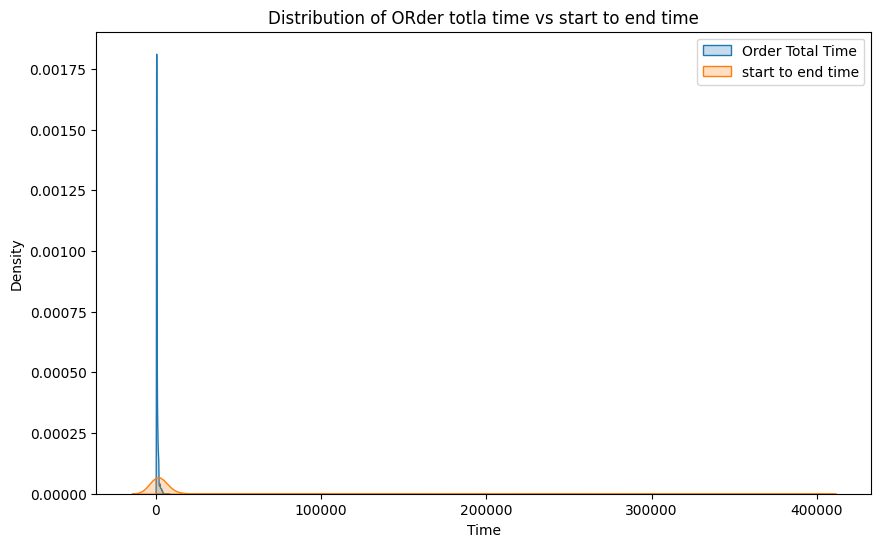

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_2['od_total_time'], label='Order Total Time', fill=True)
sns.kdeplot(df_2['start_scan_to_end_scan'], label='start to end time', fill=True)
plt.title('Distribution of ORder totla time vs start to end time')
plt.xlabel('Time')
plt.legend()
plt.show()


In [ ]:
test_stat, p_val = scpy.shapiro(df_2['od_total_time'])

print(f"Test_stat : {test_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: Data does not follow normal distribution')
else:
    print('Fail to reject H0: Data follows a normal distribution')

Test_stat : 0.6685213995508009
p-value : 1.1034623049567213e-97

Reject H0: Data does not follow normal distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
test_stat, p_val = scpy.shapiro(df_2['start_scan_to_end_scan'])

print(f"Test_stat : {test_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: Data does not follow normal distribution')
else:
    print('Fail to reject H0: Data follows a normal distribution')

Test_stat : 0.2830049771050981
p-value : 1.2055642806447882e-117

Reject H0: Data does not follow normal distribution


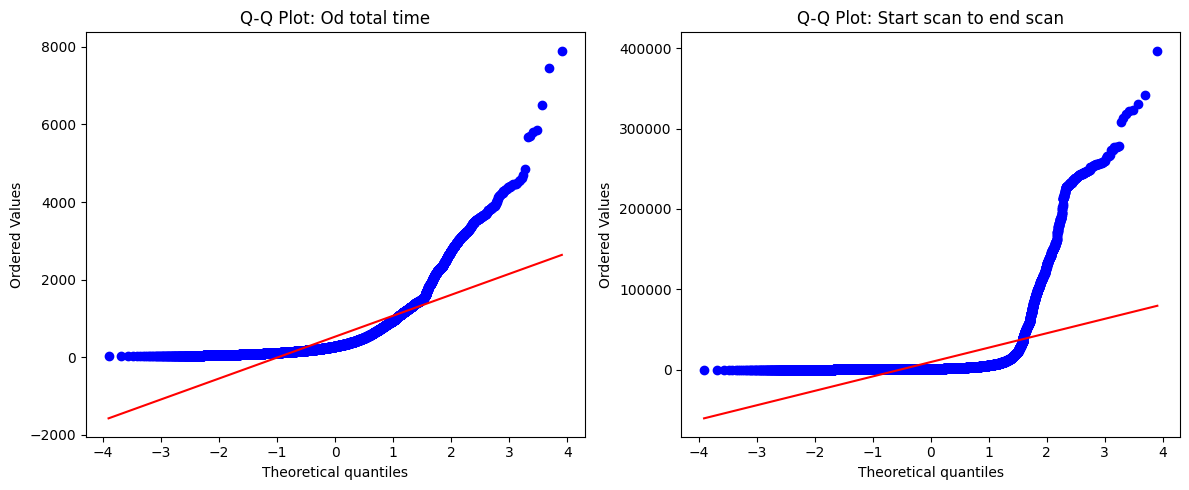

In [ ]:
# Q-Q Plot for od total time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scpy.probplot(df_2['od_total_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Od total time")

# Q-Q Plot for OSRM Time
plt.subplot(1, 2, 2)
scpy.probplot(df_2['start_scan_to_end_scan'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Start scan to end scan")

plt.tight_layout()
plt.show()


Since, data is not normally distributed, two sample t test is not appropriate in this case. Therefore, non parametric test is most suitable method for further analysis.

In [ ]:
stat, p_value = scpy.mannwhitneyu(df_2['od_total_time'], df_2['start_scan_to_end_scan'])

print(f"test statistic: {stat}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("There is a statistically significant difference between the od total trip time and the start to end scan")
else:
    print("There is no statistically significant difference between the od total trip time and the start to end scan")

test statistic: 51286069.0
P-value: 0.00000
There is a statistically significant difference between the od total trip time and the start to end scan


The analysis reveals a significant difference between od_total_time and start_scan_to_end_scan.

This suggests these two time metrics capture different aspects of trip duration—od_total_time likely reflects the total origin-to-destination planned or estimated time, whereas start_scan_to_end_scan measures the actual time between scan events during the trip.

The discrepancy highlights potential differences in operational definitions or data recording processes, which should be addressed to ensure precise trip time measurement and improve delivery tracking accuracy.

**2. Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df_2[['actual_time','osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,4076.333984,2091.007324
std,15216.874023,7956.896484
min,9.000000,6.000000
25%,142.000000,62.000000
50%,348.000000,167.000000
75%,1063.000000,516.000000
max,167920.000000,76953.000000


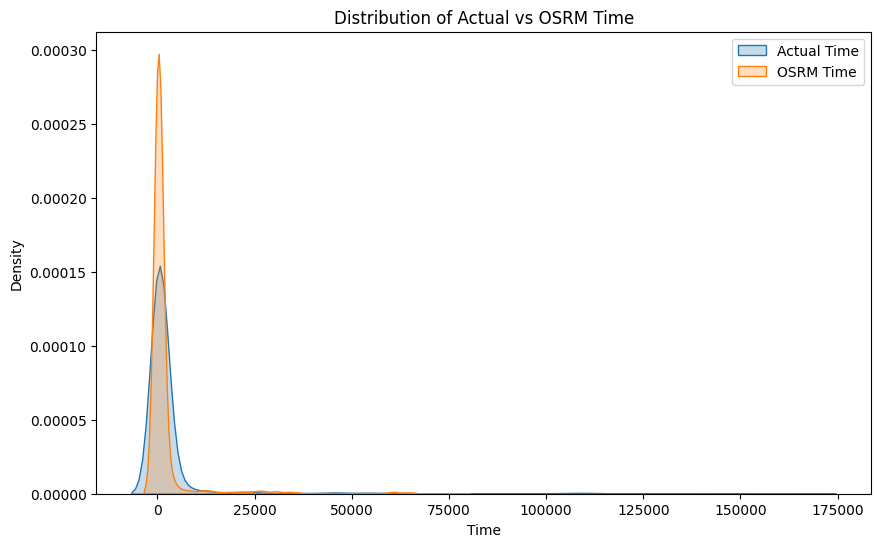

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_2['actual_time'], label='Actual Time', fill=True)
sns.kdeplot(df_2['osrm_time'], label='OSRM Time', fill=True)
plt.title('Distribution of Actual vs OSRM Time')
plt.xlabel('Time')
plt.legend()
plt.show()


Both time distributions are right-skewed, meaning most trips take shorter times but some take much longer.

The OSRM time peaks earlier (i.e. has shorter typical durations), suggesting that OSRM often underestimates actual travel time—especially for longer trips.

In [ ]:
test_stat, p_val = scpy.shapiro(df_2['actual_time'])

print(f"test_stat : {test_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: Data does not follow normal distribution')
else:
    print('Fail to reject H0: Data follows a normal distribution')


test_stat : 0.27302197796332583
p-value : 5.084154046560269e-118

Reject H0: Data does not follow normal distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
test_stat, p_val = scpy.shapiro(df_2['osrm_time'])

print(f"test_stat : {shap_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: Data does not follow normal distribution')
else:
    print('Fail to reject H0: Data follows a normal distribution')

test_stat : 0.2685661543502248
p-value : 3.4699195378013362e-118

Reject H0: Data does not follow normal distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


Both tests return very small p-values (< 0.05).

This rejects the assumption of normality for both distributions.

Therefore, non-parametric methods should be used for further comparison.

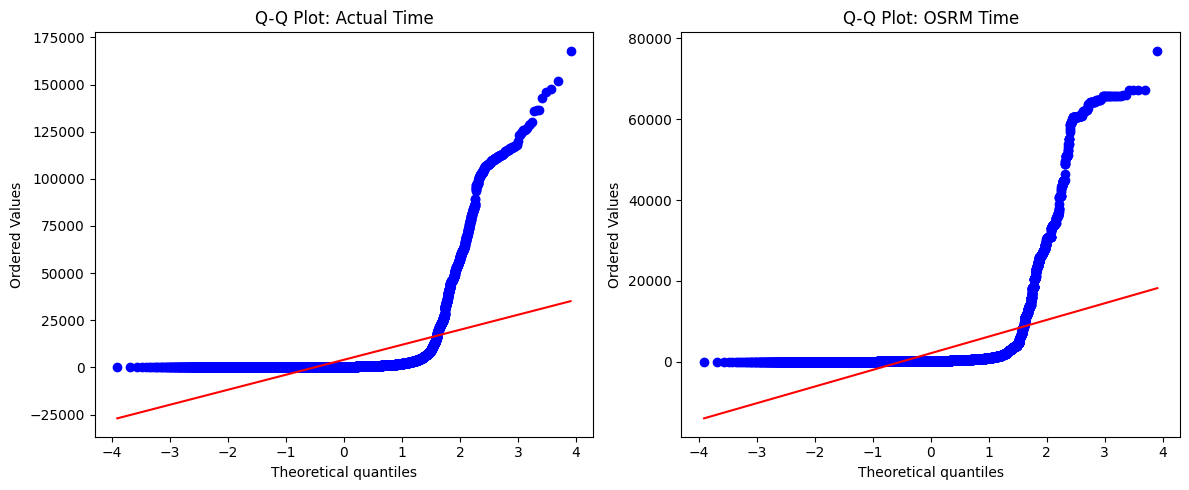

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot for Actual Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_2['actual_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Actual Time")

# Q-Q Plot for OSRM Time
plt.subplot(1, 2, 2)
stats.probplot(df_2['osrm_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: OSRM Time")

plt.tight_layout()
plt.show()


The points deviate from the diagonal, especially in the upper tail (longer times), showing positive skew.

This confirms actual_time is not normally distributed

Like actual_time, OSRM time plot shows clear upward curvature in the upper tail.

This again indicates positive skewness and non-normal distribution of OSRM time estimates.


In [ ]:
test_stat, p_value = stats.mannwhitneyu(df_2['actual_time'], df_2['osrm_time'])

print(f"test statistic: {test_stat}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("There is a statistically significant difference between the actual time and the osrm time")
else:
    print("There is no statistically significant difference between the actual time and the osrm time")

test statistic: 141469729.0
P-value: 0.00000
There is a statistically significant difference between the actual time and the osrm time


The hypothesis test shows a significant difference between actual time and OSRM estimated time (p-value = 0).

This means that the observed delivery durations differ substantially from the routing algorithm’s estimates.

The OSRM model likely underestimates or fails to fully account for real-world factors such as traffic, delays, and operational variability, which affects the accuracy of estimated delivery times (ETAs).

Improving the estimation model is essential to better align predictions with actual delivery performance.


**3. Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df_2[['actual_time','segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,4076.333984,353.892273
std,15216.874023,556.246826
min,9.000000,9.000000
25%,142.000000,66.000000
50%,348.000000,147.000000
75%,1063.000000,367.000000
max,167920.000000,6230.000000


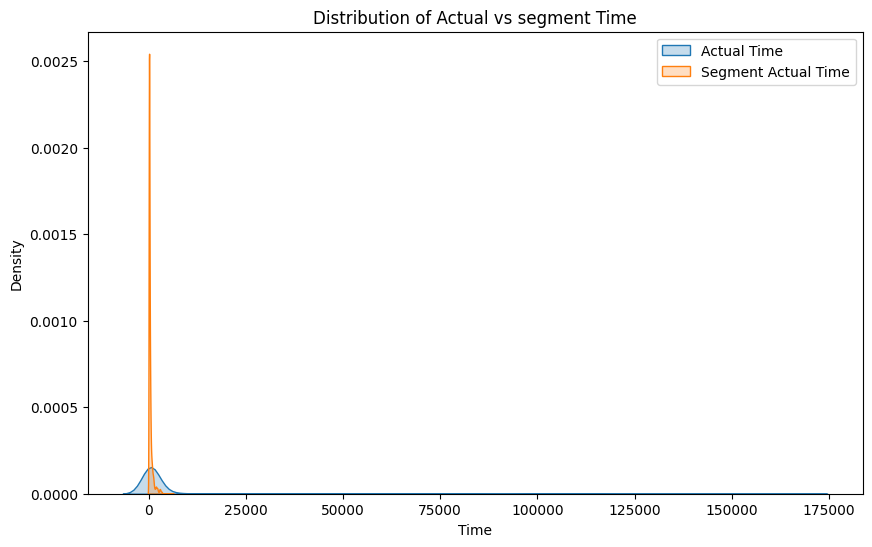

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_2['actual_time'], label='Actual Time', fill=True)
sns.kdeplot(df_2['segment_actual_time'], label='Segment Actual Time', fill=True)
plt.title('Distribution of Actual vs segment Time')
plt.xlabel('Time')
plt.legend()
plt.show()


The KDE plot clearly shows that actual_time consistently exceeds segment_actual_time, revealing operational gaps like delays or idle times not captured at the segment level.

This has important implications for delivery performance analysis

In [ ]:
# checking normality
test_stat, p_val = scpy.shapiro(df_2['segment_actual_time'])

print(f"shapiro_stat : {test_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: Data does not follow normal distribution')
else:
    print('Fail to reject H0: Data follows a normal distribution')

shapiro_stat : 0.5821857729098123
p-value : 1.785695134007935e-103

Reject H0: Data does not follow normal distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
test_stat, p_val = scpy.shapiro(df_2['actual_time'])

print(f"shapiro_stat : {test_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: Data does not follow normal distribution')
else:
    print('Fail to reject H0: Data follows a normal distribution')

shapiro_stat : 0.27302197796332583
p-value : 5.084154046560269e-118

Reject H0: Data does not follow normal distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


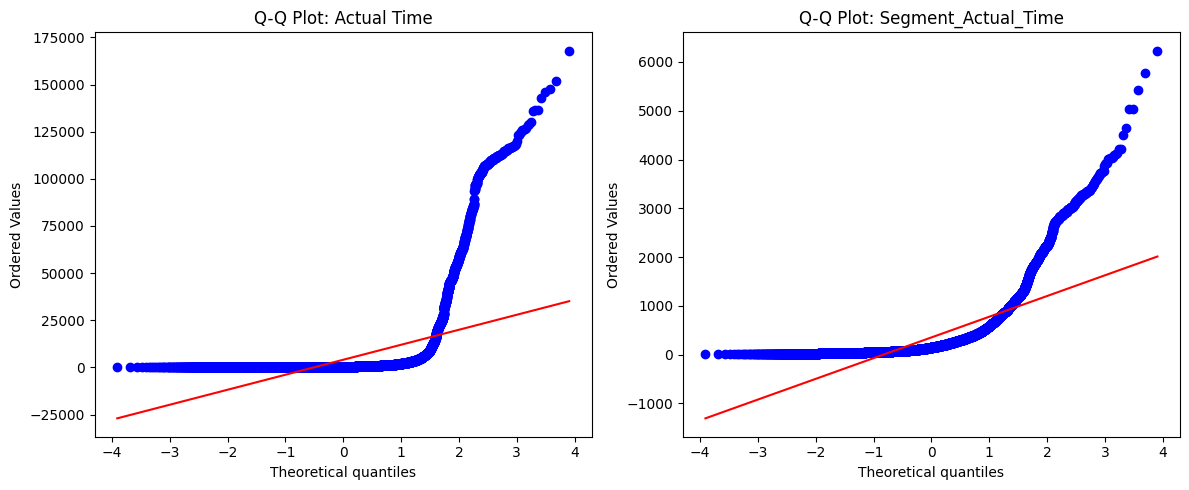

In [ ]:
# Q-Q Plot for Actual Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_2['actual_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Actual Time")

# Q-Q Plot for segment actual time
plt.subplot(1, 2, 2)
stats.probplot(df_2['segment_actual_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Segment_Actual_Time")

plt.tight_layout()
plt.show()

Both variables, actual_time and segment_actual_time, show significant deviation from the normal distribution line in their Q-Q plots, particularly in the tails.

This visually confirms the results of the Shapiro-Wilk test, indicating that neither distribution is normal.

 The upward curvature in the upper tails of both plots suggests that both actual_time and segment_actual_time distributions are right-skewed.

In [ ]:
test_stat,p_val=scpy.mannwhitneyu(df_2['actual_time'],df_2['segment_actual_time'])
print(f"test_statistic:{test_stat}")
print(f"p_value:{p_val}")
if p_val <0.05:
  print("There is a statistically significant difference between the actual trip times and the aggregated segment times")
else:
  print("There is no statistically significant difference between the actual trip times and the aggregated segment times")


test_statistic:150013130.5
p_value:0.0
There is a statistically significant difference between the actual trip times and the aggregated segment times


The test shows a significant difference between the actual trip time and the sum of segment actual times (p-value = 0).

This indicates that adding up segment times does not fully account for the total trip duration.

Possible reasons include unrecorded waiting periods, delays between segments, or missing segment data. Addressing these gaps is important to accurately measure trip durations and improve operational insights.

**4. Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df_2[['osrm_distance','segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,2784.231934,223.201157
std,10759.122070,416.628326
min,9.072900,9.072900
25%,65.738602,32.654499
50%,173.593597,70.154404
75%,607.677368,218.802399
max,102415.867188,3523.632324


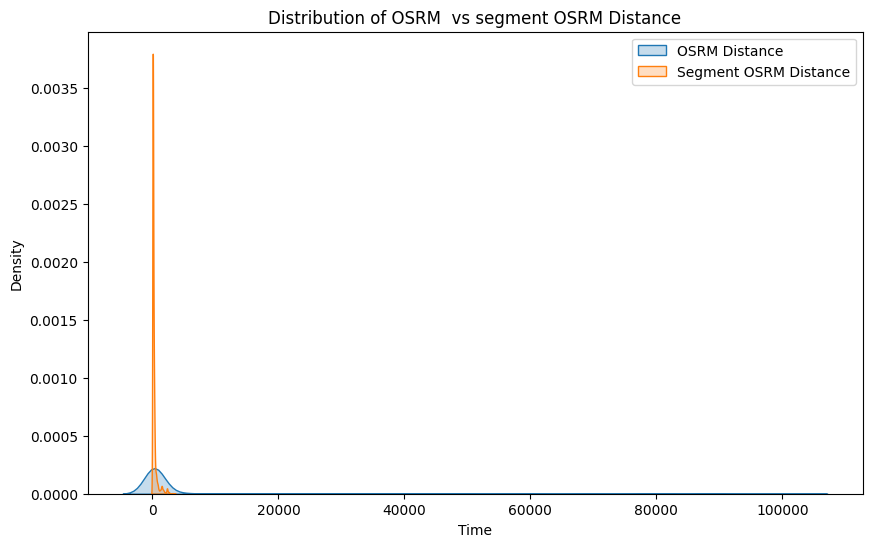

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_2['osrm_distance'], label='OSRM Distance', fill=True)
sns.kdeplot(df_2['segment_osrm_distance'], label='Segment OSRM Distance', fill=True)
plt.title('Distribution of OSRM  vs segment OSRM Distance')
plt.xlabel('Time')
plt.legend()
plt.show()


In [ ]:
#shapiro test to find normality
test_stat,p_val=scpy.shapiro(df_2['osrm_distance'])
print(f"test_statistic:{test_stat}")
print(f"p_value:{p_val}")
if p_val <0.05:
  print('The data does not follow normal distribution')
else:
  print('The data follows normal distribution')


test_statistic:0.26662413484613046
p_value:2.939634036739815e-118
The data does not follow normal distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
test_stat,p_val=scpy.shapiro(df_2['segment_osrm_distance'])
print(f"test_statistic:{test_stat}")
print(f"p_value:{p_val}")
if p_val <0.05:
  print('Reject Ho: The data does not follow normal distribution')
else:
  print('Fail to reject Ho: The data follows normal distribution')

test_statistic:0.5084269776547814
p_value:1.2107979713329913e-107
Reject Ho: The data does not follow normal distribution


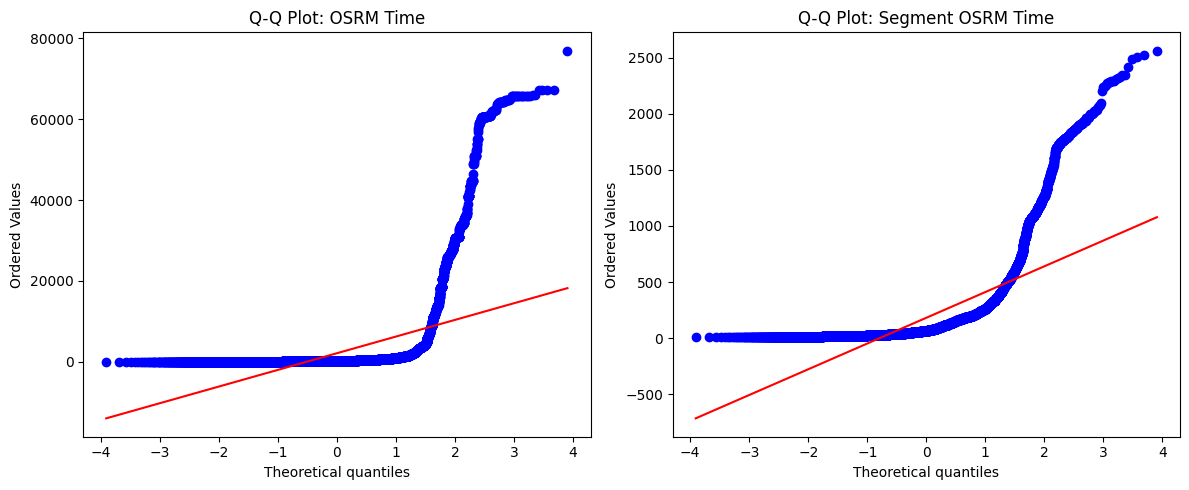

In [ ]:
# Q-Q Plot for Actual Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_2['osrm_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: OSRM Time")

# Q-Q Plot for OSRM Time
plt.subplot(1, 2, 2)
stats.probplot(df_2['segment_osrm_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Segment OSRM Time")

plt.tight_layout()
plt.show()


This show that data points deviate significantly from the straight diagonal line, especially in the upper tail.

This indicates that neither the total OSRM time nor the sum of segment OSRM times is normally distributed.

The upward curvature suggests a right-skewed distribution for both.

This visual evidence supports the conclusions drawn from the Shapiro-Wilk tests, confirming that non-parametric tests are appropriate for comparing these two distributions.

In [ ]:
test_stat, p_val =scpy.mannwhitneyu(df_2['osrm_distance'],df_2['segment_osrm_distance'])
print(f'test_statistic:{test_stat}')
print(f'p_value:{p_val}')
if p_val <0.05:
  print('There is a statistically significant difference between the osrm distance and segment osrm distance')
else:
  print('There is no statistically significant difference between osrm distance and segment osrm distance')


test_statistic:146872393.5
p_value:0.0
There is a statistically significant difference between the osrm distance and segment osrm distance


There is a significant difference between the OSRM total distance and the sum of segment OSRM distances (p-value = 0).

This suggests that the segment distances do not perfectly add up to the overall route distance.

This discrepancy could be due to inaccurate segmentation, route recalculations, or data inconsistencies. Resolving these issues will help improve route accuracy and logistics planning.


**5. Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df_2[['osrm_time','segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14817.000000,14817.000000
mean,2091.007324,180.949783
std,7956.896484,314.541412
min,6.000000,6.000000
25%,62.000000,31.000000
50%,167.000000,65.000000
75%,516.000000,185.000000
max,76953.000000,2564.000000


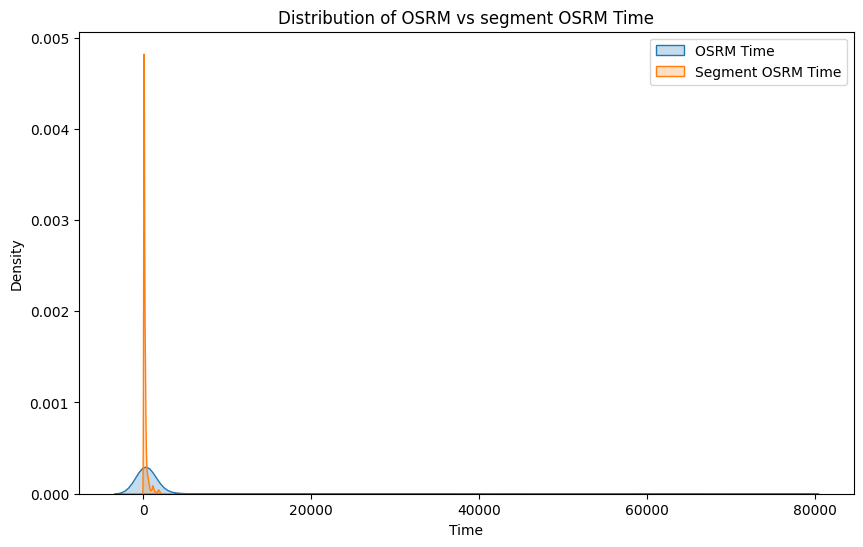

In [ ]:
#kde plot for visualization
plt.figure(figsize=(10,6))
sns.kdeplot(df_2['osrm_time'],label='OSRM Time', fill=True)
sns.kdeplot(df_2['segment_osrm_time'],label='Segment OSRM Time',fill=True)
plt.title('Distribution of OSRM vs segment OSRM Time')
plt.xlabel('Time')
plt.legend()
plt.show()



In [ ]:
#checking normality
test_stat,p_val=scpy.shapiro(df_2['osrm_time'])
print(f"test_statistic:{test_stat}")
print(f"p_value:{p_val}")
if p_val <0.05:
  print('The data does not follow normal distribution')
else:
  print('The data follows normal distribution')

test_statistic:0.2685661543502248
p_value:3.4699195378013362e-118
The data does not follow normal distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
test_stat,p_val=scpy.shapiro(df_2['segment_osrm_time'])
print(f"test_statistic:{test_stat}")
print(f"p_value:{p_val}")
if p_val <0.05:
  print('The data does not follow normal distribution')
else:
  print('The data follows normal distribution')

test_statistic:0.5331972949207214
p_value:2.617893315832657e-106
The data does not follow normal distribution


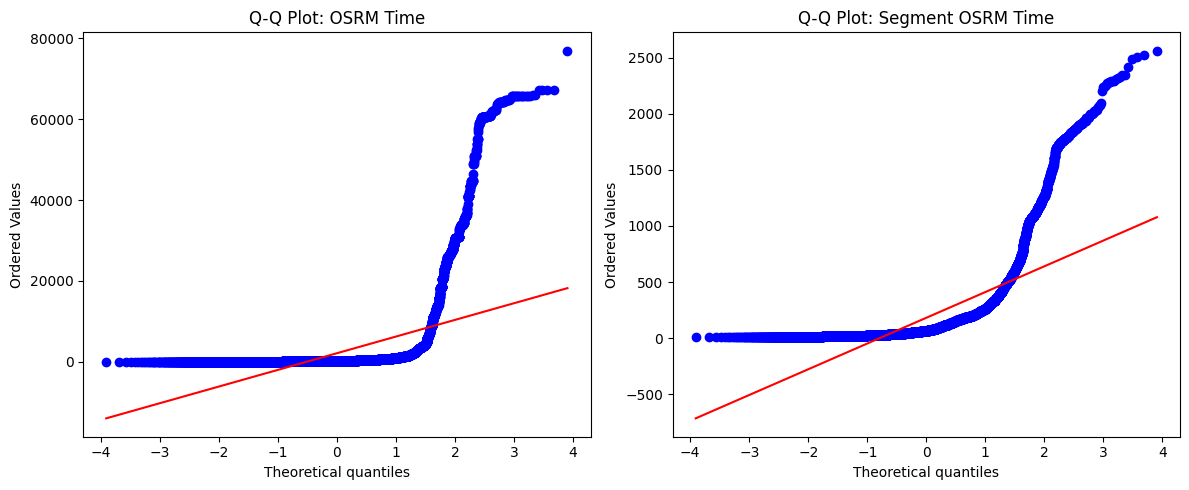

In [ ]:
# Q-Q Plot for Actual Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_2['osrm_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: OSRM Time")

# Q-Q Plot for segment actual time
plt.subplot(1, 2, 2)
stats.probplot(df_2['segment_osrm_time'], dist="norm", plot=plt)
plt.title("Q-Q Plot: Segment OSRM Time")

plt.tight_layout()
plt.show()

Both Q-Q plots (OSRM Time and Segment OSRM Time) show significant deviation from the normal distribution line, particularly in the upper tail. This visually confirms the results of the Shapiro-Wilk test.

The upward curvature indicates a right-skewed distribution for both variables.

This visual evidence supports the conclusion that neither distribution is normal, and non-parametric tests are appropriate for comparison.


In [ ]:
test_stat, p_val =scpy.mannwhitneyu(df_2['osrm_time'],df_2['segment_osrm_time'])
print(f'test_statistic:{test_stat}')
print(f'p_value:{p_val}')
if p_val <0.05:
  print('There is a statistically significant difference between the osrm time and segment osrm time')
else:
  print('There is no statistically significant difference between osrm time and segment osrm_time')

test_statistic:147916488.5
p_value:0.0
There is a statistically significant difference between the osrm time and segment osrm time


The Mann-Whitney U test results show a statistically significant difference between OSRM estimated time and segment OSRM estimated times (p-value < 0.05).

This indicates that summing up the time estimates for individual segments does not perfectly match the total OSRM time estimated for the entire trip.

The difference suggests potential inconsistencies in how OSRM time is calculated at the segment versus the trip level, which could impact the accuracy of overall route time estimations.

6. Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [ ]:
df_2.select_dtypes(include=['number']).columns


Index(['od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'start_scan_to_end_scan_min'],
      dtype='object')

In [ ]:
numerical_columns=['od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance']
df_2[numerical_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.795209,659.184525,23.461468,149.930591,280.765626,638.199071,7898.551955
start_scan_to_end_scan,14817.0,9398.344727,33701.675781,26.000000,408.000000,985.000000,2826.000000,396800.000000
actual_distance_to_destination,14817.0,32.067497,39.296524,9.000046,9.631898,19.435421,44.954380,1722.045532
actual_time,14817.0,4076.333984,15216.874023,9.000000,142.000000,348.000000,1063.000000,167920.000000
osrm_time,14817.0,2091.007324,7956.896484,6.000000,62.000000,167.000000,516.000000,76953.000000
osrm_distance,14817.0,2784.231934,10759.122070,9.072900,65.738602,173.593597,607.677368,102415.867188
segment_actual_time,14817.0,353.892273,556.246826,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949783,314.541412,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201157,416.628326,9.072900,32.654499,70.154404,218.802399,3523.632324


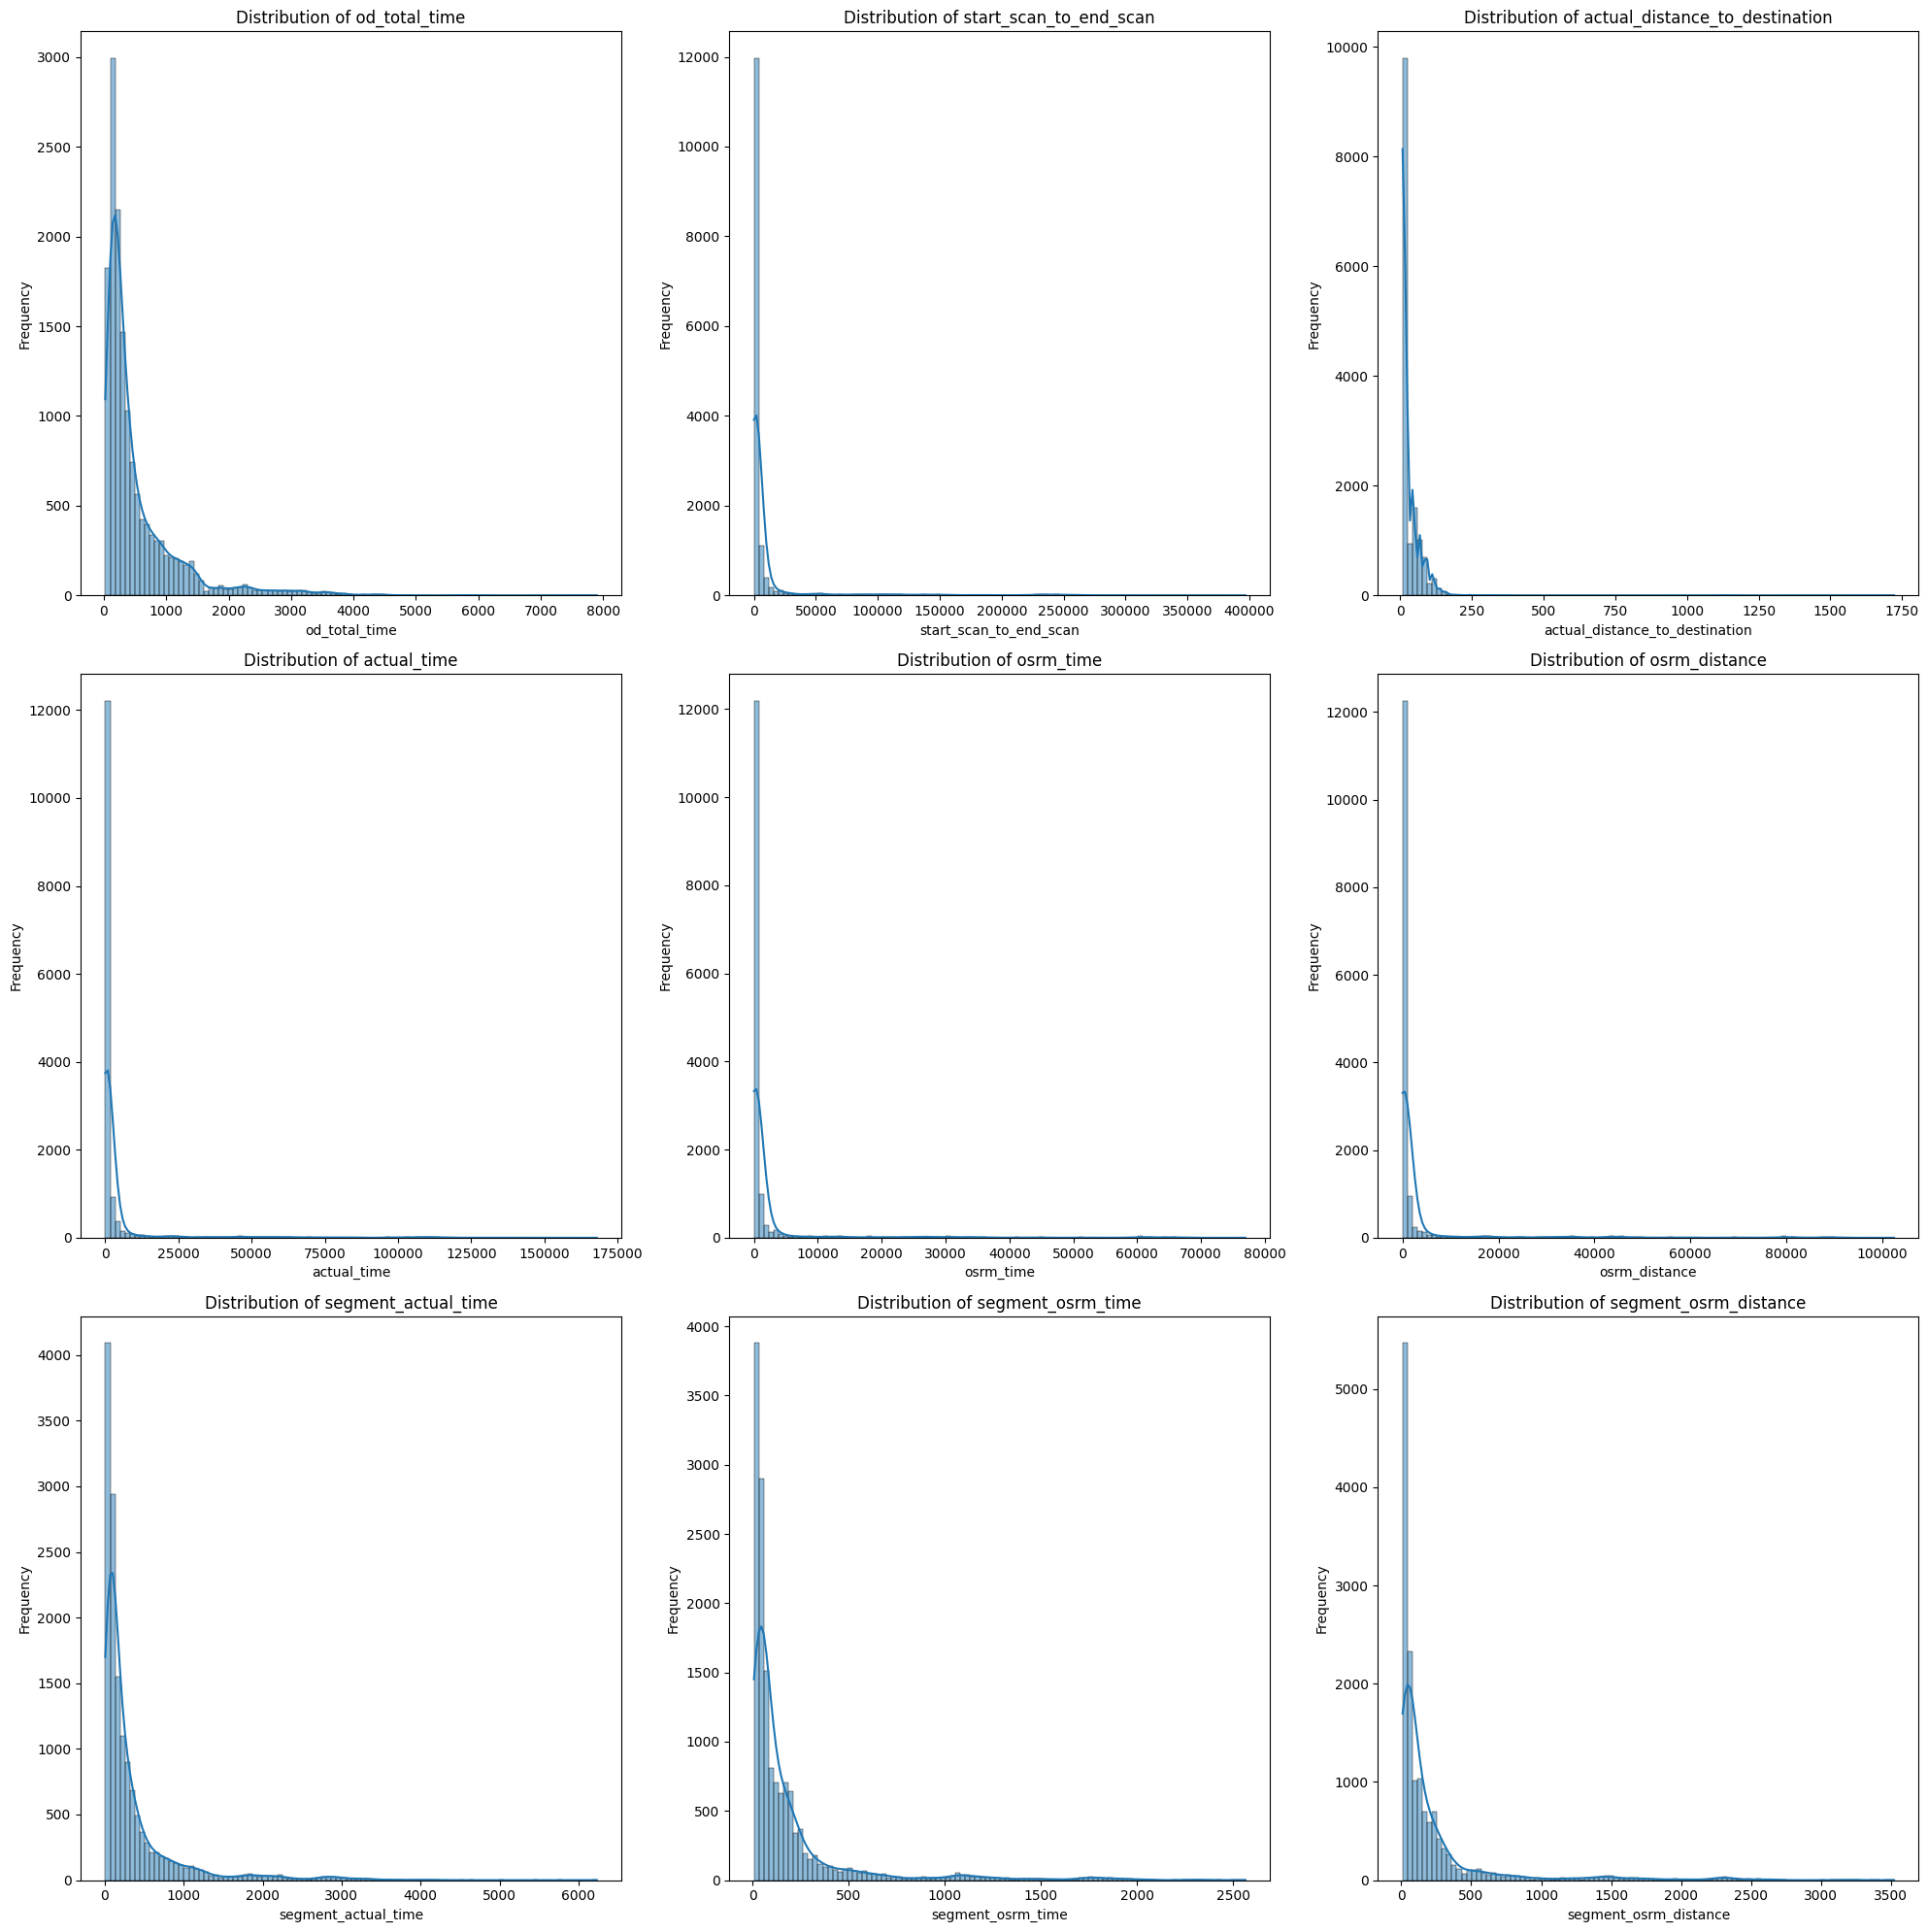

In [ ]:
plt.figure(figsize=(20,20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_2[col], bins=100, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


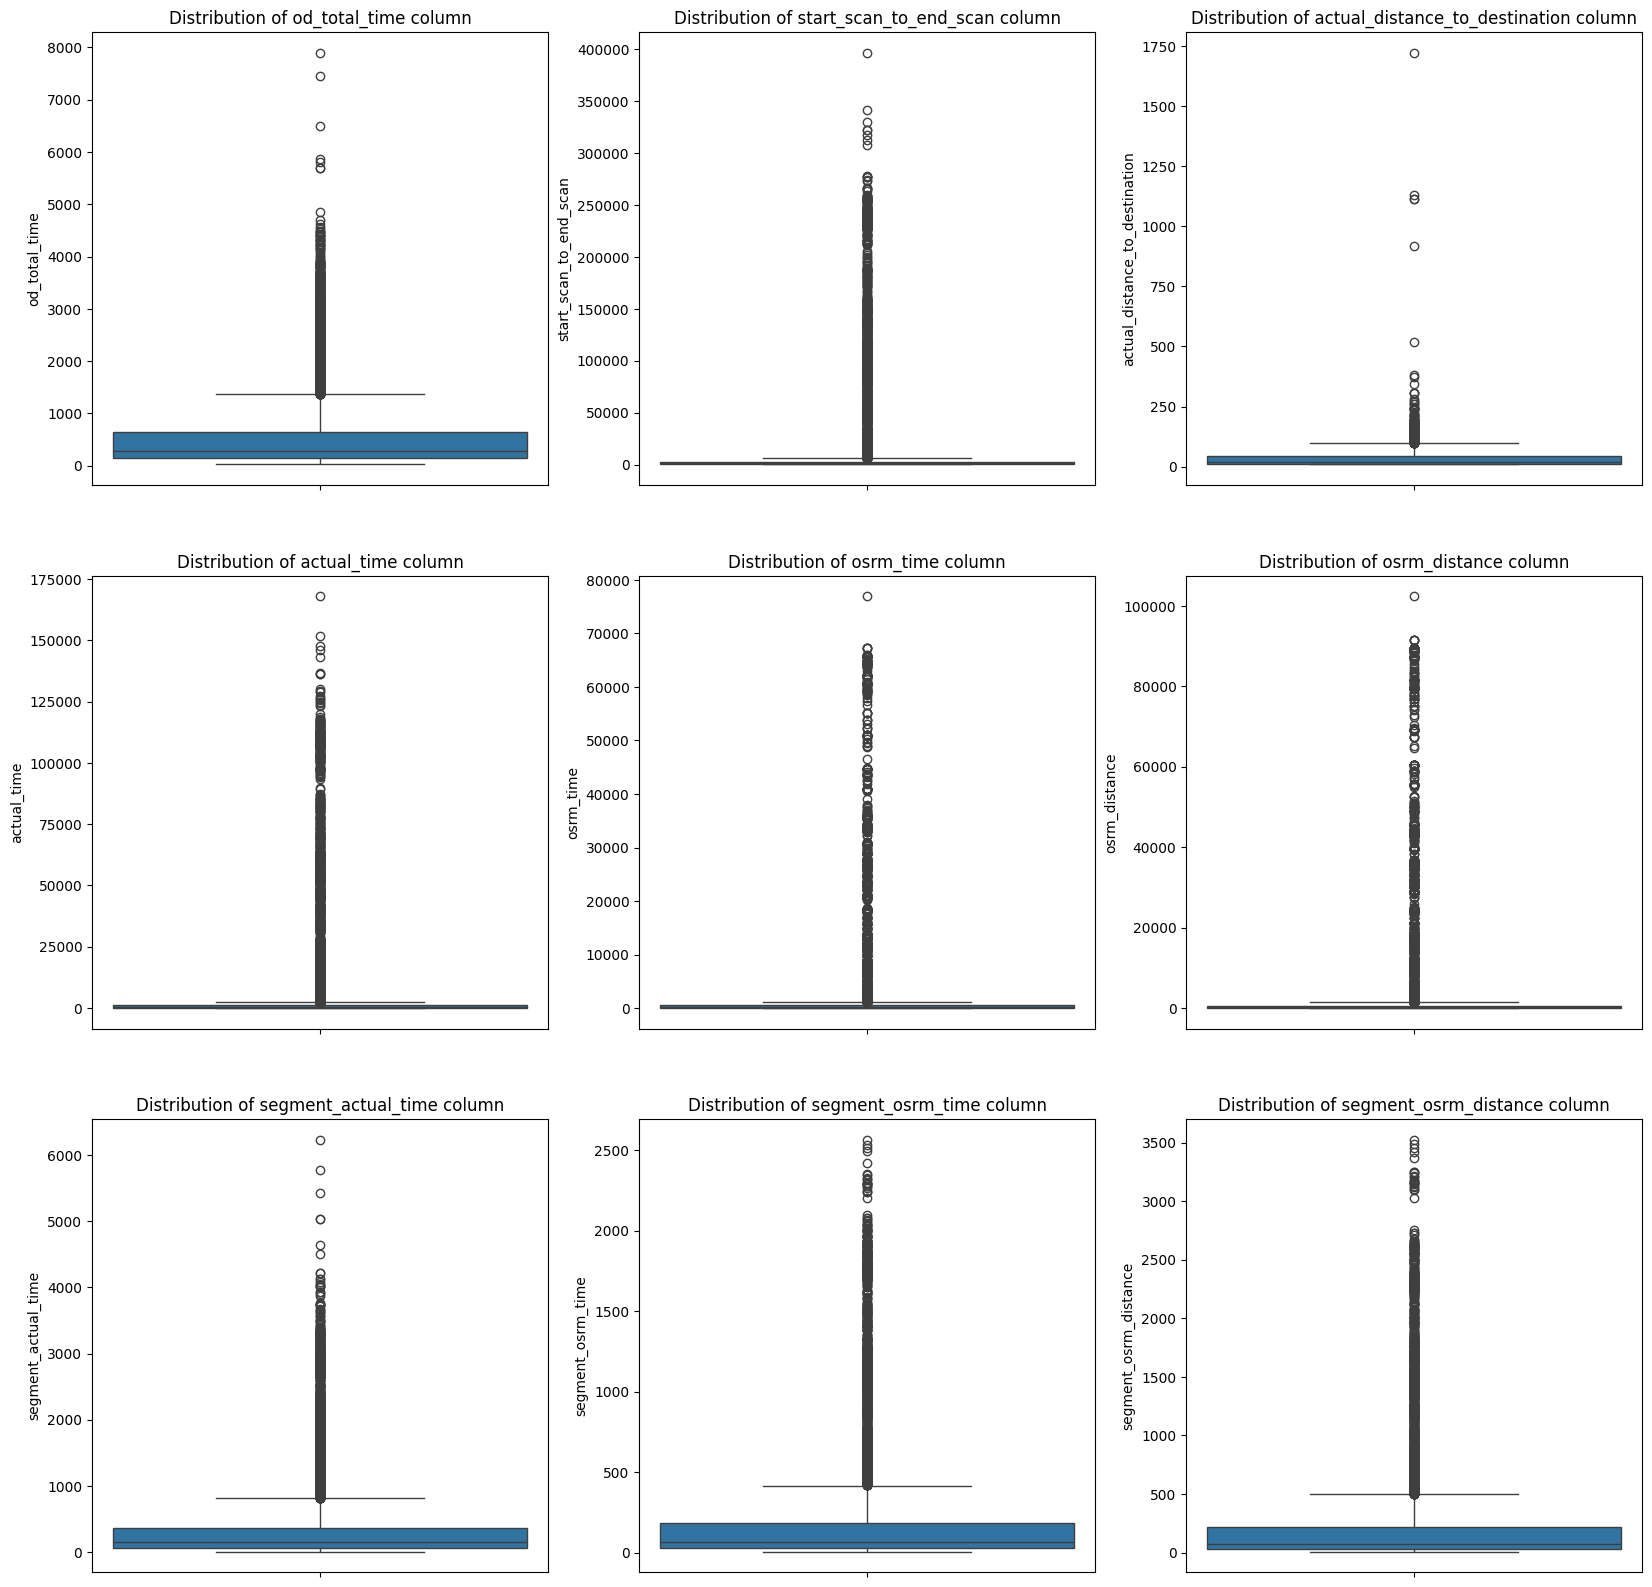

In [ ]:
plt.figure(figsize = (20, 20))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df_2[numerical_columns[i]])
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

It can be observed from the above plots that data in all the numerical columns are right skewed. It can be infered that outliers are present in the data set.

**7. Handle the outliers using the IQR method.**

In [ ]:
# prompt: generate code for outliers in numerical columns

def identify_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers_df = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return lower_bound, upper_bound, outliers_df

# Apply the function to each numerical column and print the results
print("Identifying Outliers using IQR Method:")
for col in numerical_columns:
    lower, upper, outliers = identify_outliers_iqr(df_2, col)
    print(f"\n--- Outliers in '{col}' ---")
    print(f"  Lower Bound (IQR): {lower:.2f}")
    print(f"  Upper Bound (IQR): {upper:.2f}")
    print(f"  Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print("  Sample Outliers:")
        print(outliers[[col]].head())

Identifying Outliers using IQR Method:

--- Outliers in 'od_total_time' ---
  Lower Bound (IQR): -582.47
  Upper Bound (IQR): 1370.60
  Number of Outliers: 1266
  Sample Outliers:
    od_total_time
0     2260.109800
2     3934.362520
41    2338.380200
43    2302.995534
62    1795.279778

--- Outliers in 'start_scan_to_end_scan' ---
  Lower Bound (IQR): -3219.00
  Upper Bound (IQR): 6453.00
  Number of Outliers: 2026
  Sample Outliers:
    start_scan_to_end_scan
0                  43659.0
2                 248631.0
13                 11435.0
39                 11500.0
41                114562.0

--- Outliers in 'actual_distance_to_destination' ---
  Lower Bound (IQR): -43.35
  Upper Bound (IQR): 97.94
  Number of Outliers: 706
  Sample Outliers:
    actual_distance_to_destination
30                      114.507141
42                      132.176636
57                      107.864494
62                      164.736755
68                      112.162735

--- Outliers in 'actual_time' ---


**8.Do one-hot encoding of categorical variables (like route_type)**

In [ ]:
# One-hot encode 'data' and 'route_type' columns
df_encoded = pd.get_dummies(df_2, columns=['data', 'route_type'], prefix=['data', 'route'])
# View the result
df_encoded.head()


NameError: name 'pd' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['od_total_time', 'start_scan_to_end_scan',
                     'actual_distance_to_destination', 'actual_time', 'osrm_time',
                     'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
                     'segment_osrm_distance']
scaler = MinMaxScaler()
df_normalized = df_2.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df_2[numerical_columns])
df_normalized[numerical_columns].head()


,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.284016,0.109969,0.027920,0.093341,0.101122,0.103203,0.247388,0.391712,0.373134
1,0.020082,0.002218,0.005948,0.002323,0.002651,0.002542,0.021218,0.023065,0.021373
2,0.496617,0.626566,0.024861,0.668306,0.854640,0.873362,0.530301,0.756450,0.721625
3,0.009782,0.000439,0.001374,0.000435,0.000234,0.000220,0.008037,0.003909,0.003074
4,0.088239,0.003932,0.033946,0.003258,0.002612,0.002512,0.053207,0.042611,0.039185


**Basic Analysis**

In [ ]:
#Check from where most orders are coming from (State, Corridor etc)
state_counts = df_2['source_state'].value_counts().sort_values(ascending=False)
state_counts


,count
source_state,
Maharashtra,2714
Karnataka,2143
Haryana,1838
Tamil Nadu,1039
Telangana,781
Uttar Pradesh,762
Gujarat,750
Delhi,728
West Bengal,665


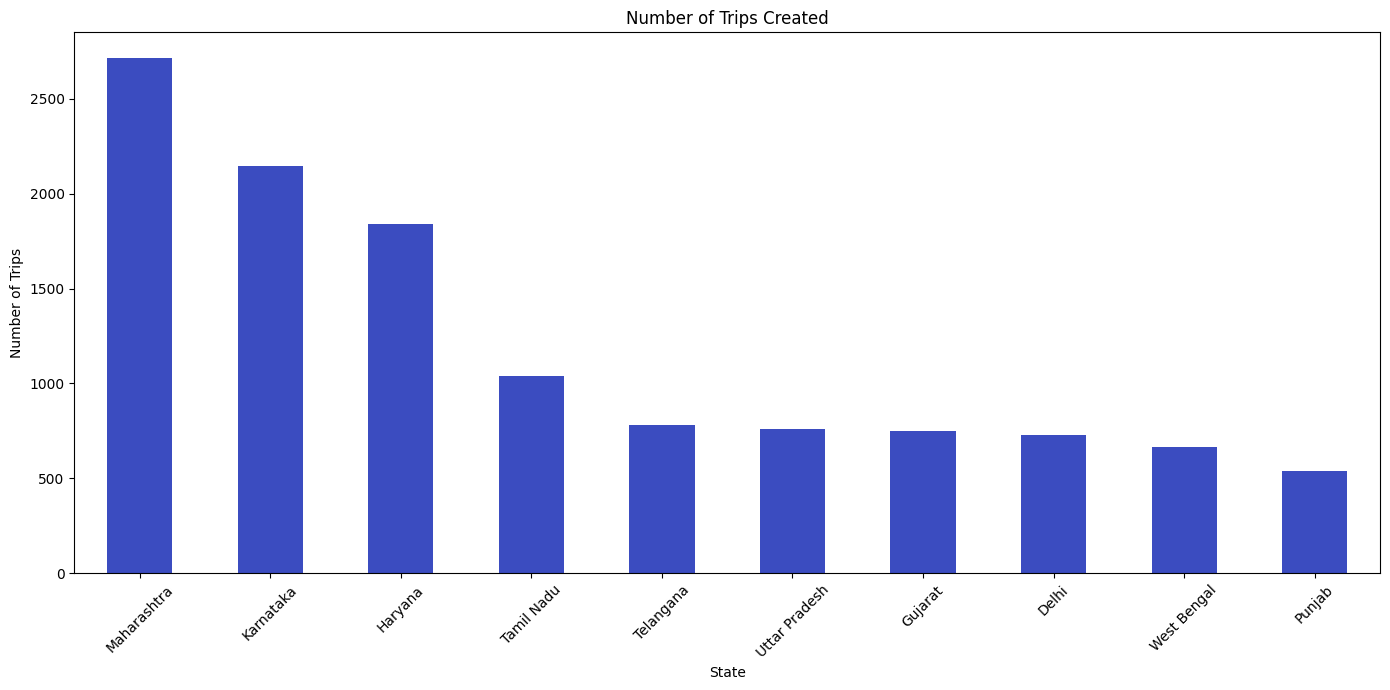

In [ ]:
state_counts.head(10).plot(kind='bar', figsize=(14, 7), colormap='coolwarm')
plt.title('Number of Trips Created')
plt.xlabel('State')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The highest trips created by maharastra followed by karnataka and haryana. These states shows stronger seller base.

In [ ]:
# Group by source and destination state to find busiest corridors
df_corridors = df_2.groupby(['source_state', 'destination_state'])['trip_uuid'].count().reset_index()

# Rename the column for clarity
df_corridors.rename(columns={'trip_uuid': 'trip_count'}, inplace=True)

# Sort to get the top busiest corridors
df_corridors = df_corridors.sort_values(by='trip_count', ascending=False)

# Display top 10 busiest corridors
df_corridors.head(10)


,source_state,destination_state,trip_count
88,Maharashtra,Maharashtra,2453
65,Karnataka,Karnataka,2056
114,Tamil Nadu,Tamil Nadu,1021
42,Haryana,Haryana,949
123,Telangana,Telangana,685
32,Gujarat,Gujarat,629
140,West Bengal,West Bengal,615
130,Uttar Pradesh,Uttar Pradesh,597
110,Rajasthan,Rajasthan,453
0,Andhra Pradesh,Andhra Pradesh,414


<ipython-input-75-14e21fdc29f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_corridors['corridor'] = top_corridors['source_state'] + ' ➝ ' + top_corridors['destination_state']
<ipython-input-75-14e21fdc29f5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_corridors, x='trip_count', y='corridor', palette='Blues_r')


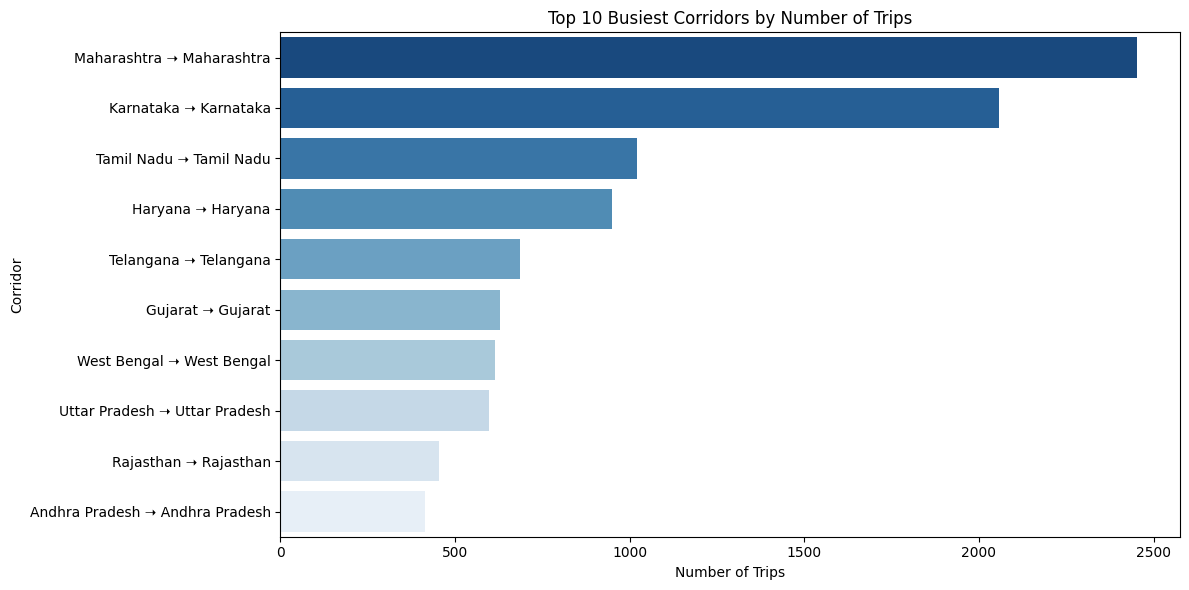

In [ ]:
top_corridors = df_corridors.head(10)

# Combine source and destination into one label for better visualization
top_corridors['corridor'] = top_corridors['source_state'] + ' ➝ ' + top_corridors['destination_state']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_corridors, x='trip_count', y='corridor', palette='Blues_r')
plt.title('Top 10 Busiest Corridors by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Corridor')
plt.tight_layout()
plt.show()


**Business Activity:**

The fact that the top 10 corridors represent a significant portion of the total trip volume indicates a concentration of logistics business in specific geographic areas and routes.

This suggests that optimizing operations, infrastructure, and resources along these high-volume corridors should be a strategic priority.

***Potential for Targeted Investment:***

Understanding these busiest routes allows for targeted investment in infrastructure, such as warehouses, sorting centers, and vehicle fleets, in or near these key source and destination states.

This can improve efficiency and reduce costs on the most frequent routes.


In [ ]:
#trips created on day basis
df_2['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int32)

In [ ]:
df_day=df_2.groupby('trip_creation_day')['trip_uuid'].count().reset_index()
df_day.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
trip_creation_day,1,2,3,12,13,14,15,16,17,18,...,21,22,23,24,25,26,27,28,29,30
trip_uuid,605,552,631,747,750,712,783,616,722,791,...,740,740,631,660,697,685,652,608,607,508


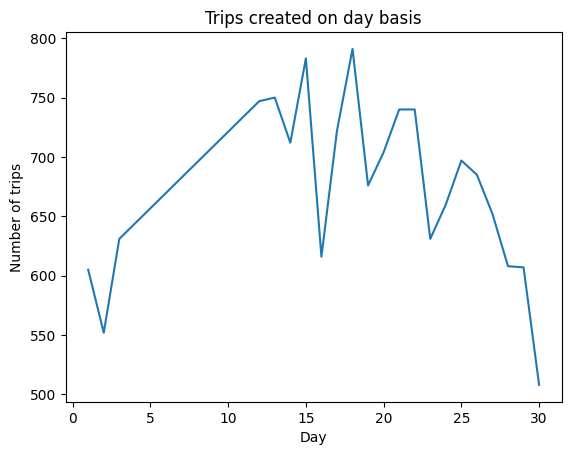

In [ ]:
sns.lineplot(data=df_day,x='trip_creation_day', y='trip_uuid')
plt.title('Trips created on day basis')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.show()

Customers usually perfer to make more orders in the mid of the month.

In [ ]:
#weekly basis
df_2['trip_creation_week'].unique()

<IntegerArray>
[37, 38, 39, 40]
Length: 4, dtype: UInt32

In [ ]:
df_week=df_2.groupby('trip_creation_week')['trip_uuid'].count().reset_index()
df_week.T

,0,1,2,3
trip_creation_week,37,38,39,40
trip_uuid,3608,5004,4417,1788


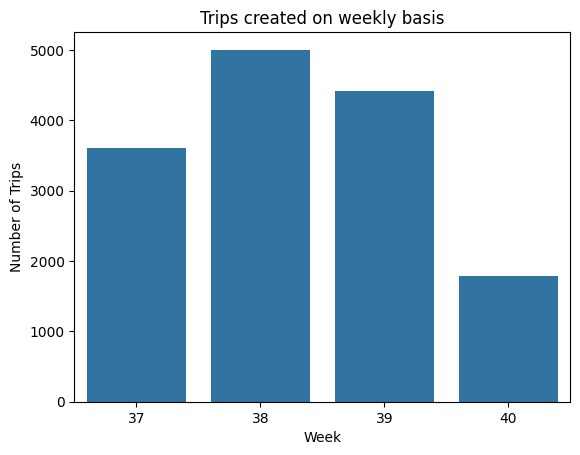

In [ ]:
sns.barplot(data=df_week,x='trip_creation_week',y='trip_uuid')
plt.title('Trips created on weekly basis')
plt.xlabel('Week')
plt.ylabel('Number of Trips')
plt.show()

Trip created on weekly basis found to be highest in 38th week followed by 39th week.

In [ ]:
#trip created on mothly basis

df_month=df_2.groupby('trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
df_month['percent']=np.round(df_month['trip_uuid']*100/df_month['trip_uuid'].sum(),2)
df_month['trip_creation_month']=df_month['trip_creation_month'].apply(lambda x: calendar.month_name[x])
df_month.T

,0,1
trip_creation_month,September,October
trip_uuid,13029,1788
percent,87.93,12.07


[]

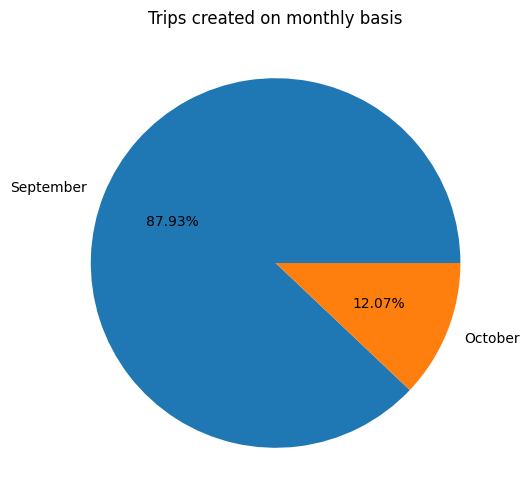

In [ ]:
#pie chart
plt.figure(figsize=(6,6))
plt.pie(df_month['trip_uuid'],labels=df_month['trip_creation_month'],autopct='%.2f%%')
plt.title('Trips created on monthly basis')
plt.plot()
plt.plot()

88% of orders created during the month of september

In [ ]:
#didtribution of trip data for the orders
df_data=df_2.groupby('data')['trip_uuid'].count().to_frame().reset_index()
df_data['percent']=np.round(df_data['trip_uuid']*100/df_data['trip_uuid'].sum(),2)
df_data

<ipython-input-120-69ec52e72ced>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_data=df_2.groupby('data')['trip_uuid'].count().to_frame().reset_index()


,data,trip_uuid,percent
0,test,4163,28.1
1,training,10654,71.9


[]

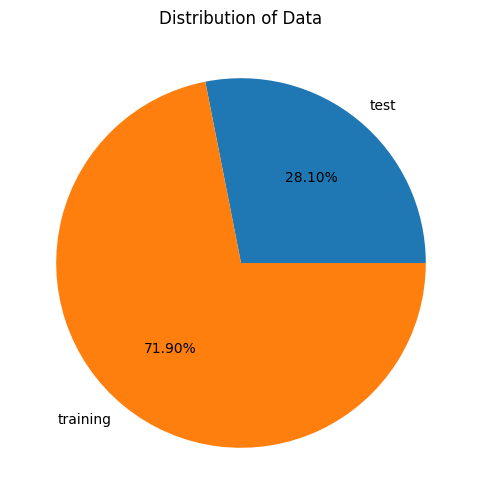

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df_data['trip_uuid'],labels=df_data['data'],autopct='%.2f%%')
plt.title('Distribution of Data')
plt.plot()
plt.plot()

~72% of data derived from training category.

In [ ]:
#distribution of orders by route type
df_route_type=df_2.groupby('route_type')['trip_uuid'].count().to_frame().reset_index()
df_route_type['percent']=np.round(df_data['trip_uuid']*100/df_data['trip_uuid'].sum(),2)
df_route_type

<ipython-input-124-9d7542920432>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_route_type=df_2.groupby('route_type')['trip_uuid'].count().to_frame().reset_index()


,route_type,trip_uuid,percent
0,Carting,8908,60.12
1,FTL,5909,39.88


[]

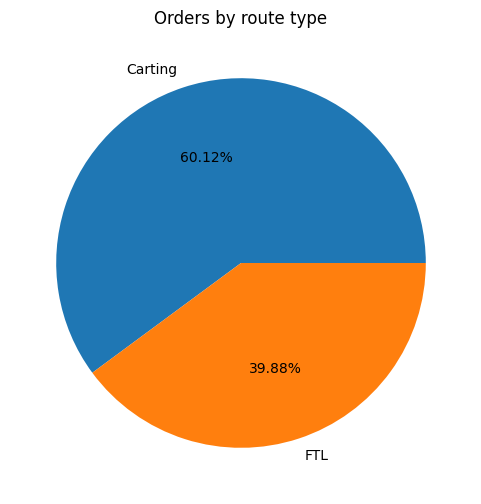

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df_route_type['trip_uuid'],labels=df_data['route_type'],autopct='%.2f%%')
plt.title('Orders by route type')
plt.plot()
plt.plot()

60.12% of orders are delivered through carting route type.

**Business Insights for Delhivery Logistics**

1.**OSRM Trip Planning Needs Improvement**

Delivery trips take ~27% longer than planned (OSRM predictions), causing delays. For example, a 3-hour planned trip often takes over 6 hours.

**Recommendation:** Fix routing engine configurations to better account for real-world factors like traffic or road conditions.

**2. Focus on High-Volume States**

Key hubs: Gurgaon (Haryana), Karnataka, Tamil Nadu, and Uttar Pradesh are major sources/destinations.

**Recommendation:** Optimize routes in these states to reduce delays and improve delivery efficiency.

**3. Address Distance Discrepancies**

Actual routes are sometimes shorter than OSRM-planned distances (e.g., 234 km vs. 285 km on average). Drivers might be taking shortcuts or avoiding traffic.

**Recommendation:** Investigate why drivers deviate from planned routes and update OSRM with real-world insights.

**4. Prepare for State-Specific Challenges**

States like Karnataka and Tamil Nadu have mixed terrain (e.g., cities and rural areas), which may cause delays.

**Recommendation:** Plan for traffic and terrain issues, especially during festivals or peak seasons.

**5. Extend Data Collection Period**

Current data covers only 2 months (Sep-Oct 2018), limiting trend analysis.

**Recommendation:** Collect data for 6–12 months to identify seasonal patterns (e.g., holiday rush).

**6. Improve Delivery Time Predictions**

The average delay per trip segment is 27%, hurting customer trust.

**Recommendation:** Use real-time traffic data to align OSRM predictions with actual delivery times.

**Summary:**

Delhivery’s biggest opportunities lie in fixing route-planning inaccuracies, standardizing location data, and focusing on high-demand states. Addressing these will reduce delays, lower costs, and improve customer satisfaction.

In [1]:
!git clone https://github.com/Ishwariya-Ayyappan/delhivery-feature-engineering-logistics


Cloning into 'delhivery-feature-engineering-logistics'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [3]:
%cd delhivery-feature-engineering-logistics
%ls

[Errno 2] No such file or directory: 'delhivery-feature-engineering-logistics'
/content/delhivery-feature-engineering-logistics
README.md


In [8]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Clone your GitHub repo
!git clone https://github.com/Ishwariya-Ayyappan/delhivery-feature-engineering-logistics.git
%cd delhivery-feature-engineering-logistics



Mounted at /content/drive
Cloning into 'delhivery-feature-engineering-logistics'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
Receiving objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
/content/delhivery-feature-engineering-logistics/delhivery-feature-engineering-logistics


In [9]:
!cp "/content/drive/My Drive/Colab Notebooks/delhivery.ipynb" .
%ls

cp: cannot stat '/content/drive/My Drive/Colab Notebooks/delhivery.ipynb': No such file or directory
README.md
